__MODEL BOLA HOMOGEN__

Dibuat sintetik data dari 5 bola homogen yang masing-masing mempunyai posisi, radius, dan densitas seperti yang dilampirkan (Parameter Model Sintetik.csv). Perbedaan dengan buku ada pada jumlah model yang dipakai.

__PENAMPANG 2D__

In [107]:
import os
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

>__IMPORT MODEL SINTETIK__

In [108]:
data=pd.read_csv("Parameter Model Sintetik.csv")
data

,No.,X₀ (m),Z₀(m),R(m),ρ(Kg/m³)
0,1,100,150,100,2000
1,2,300,200,100,9000
2,3,650,100,100,2000
3,4,950,200,100,5000
4,5,475,120,50,7000


>__DEFINE PARAMETER MODEL__

In [109]:
ds=np.array(data)

#Define X each circles
xc1=ds[0,1]
xc2=ds[1,1]
xc3=ds[2,1]
xc4=ds[3,1]
xc5=ds[4,1]

#Define Z each circles
zc1=ds[0,2]
zc2=ds[1,2]
zc3=ds[2,2]
zc4=ds[3,2]
zc5=ds[4,2]

#Define Radius each circles
Rc1=ds[0,3]
Rc2=ds[1,3]
Rc3=ds[2,3]
Rc4=ds[3,3]
Rc5=ds[4,3]

#Define Rho(Density) each circles
Rhoc1=ds[0,4]
Rhoc2=ds[1,4]
Rhoc3=ds[2,4]
Rhoc4=ds[3,4]
Rhoc5=ds[4,4]

>__GRAVITY RESPONS FUNCTION__
    
    Respons gravitasi komponen vertikal suatu model
    berbentuk bola homogen dinyatakan oleh persamaan berikut:

    eq. 7.1 Halaman 105 (Grandhis, 2009)

In [110]:
#Fungsi Fwd Modeling
G = 6.67e-11                    #Define G (m^3 kg^-1 s^-2)
x = np.arange(0,1001,20)

def func_gz(xc1, zc1, Rc1, Rhoc1):
    gz = G*((4/3)*np.pi*(Rc1**3)*zc1*Rhoc1)/(((x-xc1)**2 + zc1**2)**(3/2))
    return gz

>__gz CALCULATION__

In [111]:
gz1 = func_gz(xc1, zc1, Rc1, Rhoc1)     #Perhitungan gz bola pertama
gz2 = func_gz(xc2, zc2, Rc2, Rhoc2)     #Perhitungan gz bola kedua
gz3 = func_gz(xc3, zc3, Rc3, Rhoc3)     #Perhitungan gz bola ketiga
gz4 = func_gz(xc4, zc4, Rc4, Rhoc4)     #Perhitungan gz bola keempat
gz5 = func_gz(xc5, zc5, Rc5, Rhoc5)     #Perhitungan gz bola kelima

>__VISUALISASI MODEL DAN HASIL FORWARD MODELING__

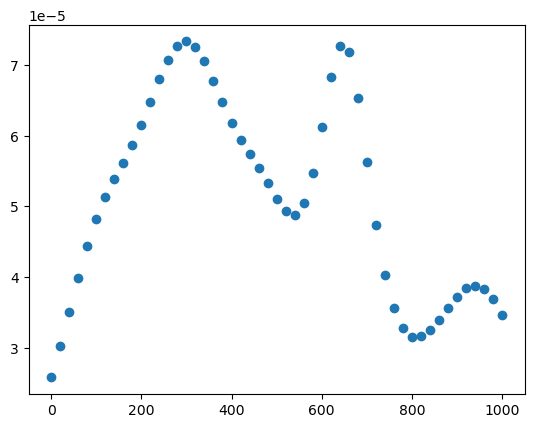

In [112]:
gz_total = gz1 + gz2 + gz3 + gz4 +gz5
plt.plot(x, gz_total, "o")
plt.show()

>__PEMBERIAN NOISE PADA DATA HASIL FWD MODELING__

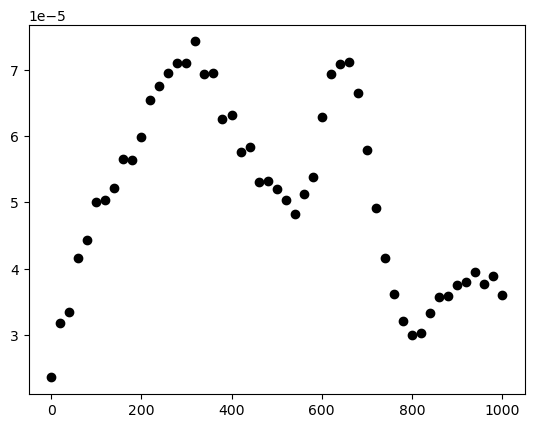

In [113]:
#Generate noise
rng = np.random.default_rng(seed=10)
noise = rng.uniform(-0.25e-5,0.25e-5, len(gz_total))

#Menambahkan noise pada data
gzt_noise = gz_total-noise

#Plot gz total dengan pengaruh noise
plt.plot(x, gzt_noise, "ko")
plt.show()

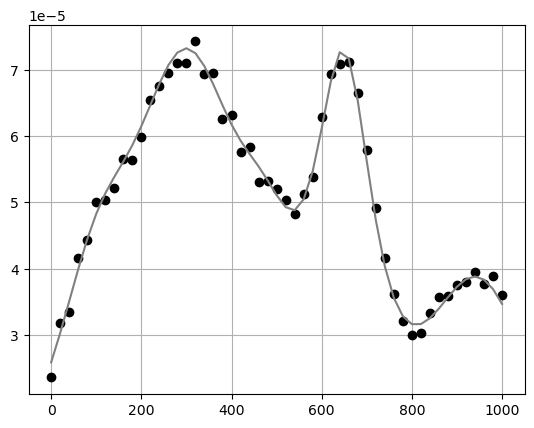

In [144]:
#Plot perbandingan data dengan noise dan tanpa noise
plt.plot(x, gzt_noise, "ko")
plt.plot(x, gz_total, "gray")
plt.grid()
plt.show()

>__VISUALISASI MODEL BOLA HOMOGEN DALAM TANAH__

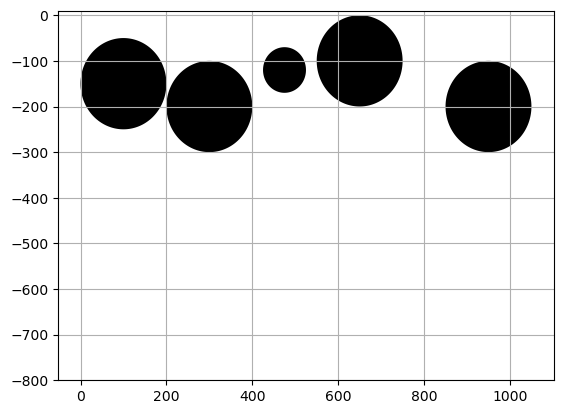

In [145]:
#Define circle function
def circle(xc1, zc1, Rc1):
    q = np.linspace(0, 2*np.pi, 1000)

    xcircle = Rc1*np.cos(q)+xc1
    zcircle = Rc1*np.sin(q)-zc1

    return xcircle, zcircle

#Define Model Circle 1
x1, y1 = circle(xc1, zc1, Rc1)

#Define Model Circle 2
x2, y2 = circle(xc2, zc2, Rc2)

#Define Model Circle 3
x3, y3 = circle(xc3, zc3, Rc3)

#Define Model Circle 4
x4, y4 = circle(xc4, zc4, Rc4)

#Define Model Circle 5
x5, y5 = circle(xc5, zc5, Rc5)

plt.fill(x1, y1, 'k')
plt.fill(x2, y2, 'k')
plt.fill(x3, y3, 'k')
plt.fill(x4, y4, 'k')
plt.fill(x5, y5, 'k')
plt.ylim(-800, 10)
plt.grid()
plt.show()

>__VISUALISASI DATA DAN MODEL__

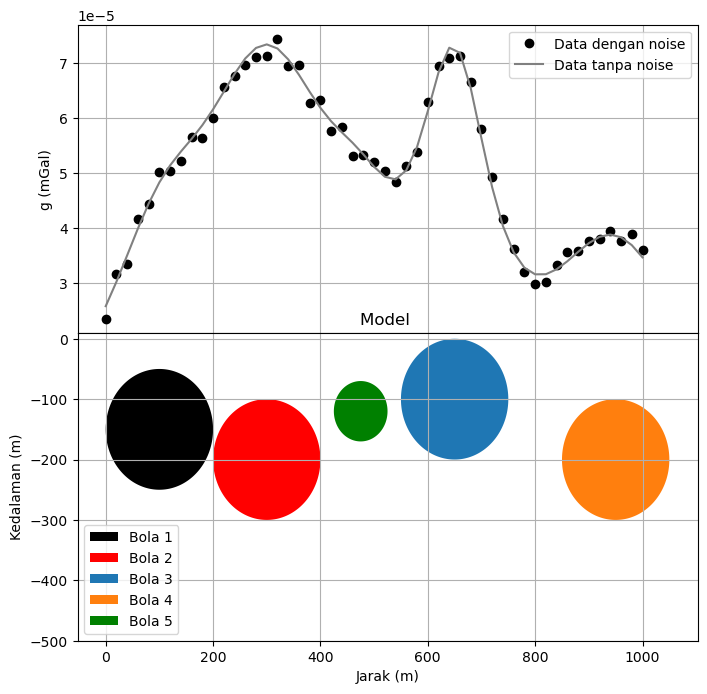

In [175]:
#Plot 2 Sumbu
fig,(ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))

#Plot Data
ax1.plot(x, gzt_noise, "ko", label="Data dengan noise")
ax1.plot(x, gz_total, "gray", label="Data tanpa noise")
ax1.legend()
ax1.set_ylabel("g (mGal)")
ax1.grid()

#Plot Model
ax2.fill(x1, y1, 'k', label="Bola 1")
ax2.fill(x2, y2, 'r', label="Bola 2")
ax2.fill(x3, y3, 'p', label="Bola 3")
ax2.fill(x4, y4, 'o', label="Bola 4")
ax2.fill(x5, y5, 'g', label="Bola 5")
ax2.set_ylim(-500, 10)
ax2.set_ylabel("Kedalaman (m)")
ax2.set_xlabel("Jarak (m)")
ax2.legend()
ax2.grid()

plt.subplots_adjust(hspace=0)
plt.title("Model ")
plt.show()

>__KESIMPULAN__

    Percobaan forward modeling 2D bola homogen dilakukan sesuai dengan yang ada di buku dengan penambahan 1 model baru yaitu model kelima (bola hijau). Apabila dilakukan perbandingan dengan data hasil forward model yang ada di buku, terjadi peningkatan nilai g diantara jarak 400 dan 600 m. Hal ini disebabkan oleh adanya penambahan model baru yaitu bola homogen kelima yang membuat nilai data anomali gravitasi meningkat. Segala penjabaran kuantitatif mengenai efek penambahan model bola kelima tidak akan terjadi dalam waktu dekat dikarenakan malash.

__RUANG 3D__

Istirahat dulu...